In [1]:
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv("Frogs_MFCCs.csv")

In [3]:
df = df.fillna(df.mean()).drop('RecordID',axis=1)
y = df['Family']

<ipython-input-3-36ff5e77b6da>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean()).drop('RecordID',axis=1)


In [4]:
def define_categories(data):
    categorical_id = []
    for i, type in enumerate(data.dtypes):
        if type == 'object':
            categorical_id.append(i)
            
    return categorical_id

In [5]:
def one_hot_encoding(data):
    les = {}
    df = data.copy()
    categorical_id = define_categories(df)
    for j, column in enumerate(df.columns):
        le = preprocessing.LabelEncoder()
        if j in categorical_id:
            le.fit(list(df[column]))
            df[column] = le.transform(list(df[column]))
            les.update({column : le})
    return les, df

In [6]:
def normalize(data):
    max_of_each_feature = {}
    df_max_scaled = data.copy()
    # apply normalization techniques
    for column in df_max_scaled.columns:
        max_of_each_feature.update({column :df_max_scaled[column].abs().max()})
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
    return df_max_scaled, max_of_each_feature

In [7]:
less_obj, df_one_hot_encoded = one_hot_encoding(df)

In [8]:
df_scaled, _ = normalize(df_one_hot_encoded)

In [229]:
df_scaled.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.421672,0.270435,0.100945,-0.260297,-0.231870,0.130926,...,-0.035808,-0.159069,-0.102226,-0.014055,0.123301,0.275480,0.032481,1.0,0.0,0.0
1,1.0,0.171534,-0.098975,0.268425,0.450214,0.278305,0.060835,-0.385902,-0.281414,0.179449,...,0.017925,-0.133558,-0.074421,-0.051860,0.043050,0.190949,0.067226,1.0,0.0,0.0
2,1.0,0.152317,-0.082973,0.287128,0.366920,0.196908,0.008714,-0.420176,-0.296942,0.244195,...,0.124550,-0.074420,-0.031068,-0.098012,-0.053616,0.230050,0.178531,1.0,0.0,0.0
3,1.0,0.224392,0.118985,0.329432,0.494636,0.374393,0.015501,-0.337113,-0.133030,0.283929,...,-0.074883,-0.199674,-0.233152,-0.191699,-0.117065,-0.043387,0.055423,1.0,0.0,0.0
4,1.0,0.087817,-0.068345,0.306967,0.439913,0.258384,0.006884,-0.460400,-0.234000,0.279790,...,0.093689,-0.071767,-0.069896,-0.130079,-0.067002,0.252105,0.183348,1.0,0.0,0.0


In [9]:

X = df_scaled.drop('Family',axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

In [11]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
y_train_pred = clf.predict(X_train.values)
accuracy_score(y_train, y_train_pred)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9763701350277998

In [13]:
y_test_pred = clf.predict(X_test.values)
accuracy_score(y_test, y_test_pred)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.968040759610931

In [14]:
clf.n_support_

array([ 41,  97, 233, 190], dtype=int32)

# **B**

In [15]:
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
c_arr = np.arange(0.1,50, 0.5)
acc = []
for c in c_arr:
  clf = svm.SVC(C=c)
  clf.fit(X_train2, y_train2)
  y_valid_pred = clf.predict(X_valid.values)
  acc.append(accuracy_score(y_valid, y_valid_pred))

([<matplotlib.axis.YTick at 0x7fe66494d9d0>,
 <a list of 7 Text major ticklabel objects>)

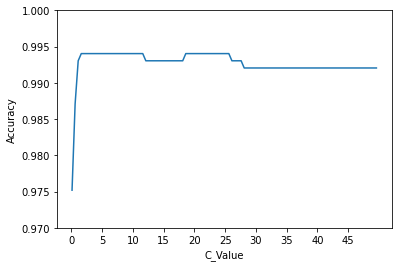

In [47]:
plt.plot(c_arr, acc)
plt.xlabel('C_Value')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0.97,1,0.005))

In [18]:
clf = svm.SVC(C=3)
clf.fit(X_train2, y_train2)

SVC(C=3)

In [19]:
y_valid_pred = clf.predict(X_valid.values)
accuracy_score(y_valid, y_valid_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9940476190476191

In [22]:
y_test_pred = clf.predict(X_test.values)
accuracy_score(y_test, y_test_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9949050486336267

In [21]:
y_train_pred = clf.predict(X_train2.values)
accuracy_score(y_train2, y_train_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9990069513406157

In [23]:
clf.n_support_

array([ 20,  52, 129, 106], dtype=int32)

## **C**

In [35]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train2, y_train2)

SVC()

In [36]:
y_valid_pred = clf.predict(X_valid.values)
accuracy_score(y_valid, y_valid_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9930555555555556

In [37]:
y_train_pred = clf.predict(X_train2.values)
accuracy_score(y_train2, y_train_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9982621648460774

In [38]:
y_test_pred = clf.predict(X_test.values)
accuracy_score(y_test, y_test_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9930523390458545

In [39]:
clf.n_support_

array([ 30,  81, 191, 136], dtype=int32)

## **D**

In [41]:
clf = svm.SVC(kernel='rbf', C=3)
clf.fit(X_train2, y_train2)

SVC(C=3)

In [42]:
y_valid_pred = clf.predict(X_valid.values)
accuracy_score(y_valid, y_valid_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9940476190476191

In [43]:
y_train_pred = clf.predict(X_train2.values)
accuracy_score(y_train2, y_train_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9990069513406157

In [44]:
y_test_pred = clf.predict(X_test.values)
accuracy_score(y_test, y_test_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9949050486336267

In [45]:
clf.n_support_

array([ 20,  52, 129, 106], dtype=int32)